In [1]:
#importing libraries
import pandas as pd
import numpy as np
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
test_file=pd.read_csv('datasets/test_file.csv')
train_file=pd.read_csv('datasets/train_file.csv')
meal_file=pd.read_csv('datasets/meal_info.csv')
fullfilment_file=pd.read_csv('datasets/fulfilment_center_info.csv')


In [3]:
df=test_file.copy()
print(df.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  


In [4]:
df.rename(columns={"id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured":"new"},inplace=True)


In [5]:
# df['id']=df.new.str.split(',').str[0]
# df['week']=df.new.str.split(',').str[1]
# df['center_id']=df.new.str.split(',').str[2]
# df['meal_id']=df.new.str.split(',').str[3]
# df['checkout_price']=df.new.str.split(',').str[4]
# df['base_price']=df.new.str.split(',').str[5]
# df['emailer_for_promotion']=df.new.str.split(',').str[6]
# df['homepage_featured']=df.new.str.split(',').str[7]
# df=df.iloc[:,1:]


In [6]:
df['id']=df['id'].astype('int')
df['week']=df['week'].astype('int')
df['center_id']=df['center_id'].astype('int')
df['meal_id']=df['meal_id'].astype('int')
df['checkout_price']=df['checkout_price'].astype('float')
df['base_price']=df['base_price'].astype('float')

df['emailer_for_promotion']=df['emailer_for_promotion'].astype('int')
df['homepage_featured']=df['homepage_featured'].astype('int')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
train_df = pd.merge(train_file,fullfilment_file, on='center_id')
test_df= pd.merge(df,fullfilment_file, on='center_id')


In [8]:
train_df = pd.merge(train_df,meal_file, on='meal_id')
test_df = pd.merge(test_df,meal_file, on='meal_id')

In [9]:
train_df.tail()
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [10]:
encoder=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()

In [11]:
main_data=train_df.copy()
main_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [12]:
main_data['category']=encoder.fit_transform(main_data['category'])
main_data['center_type']=encoder2.fit_transform(main_data['center_type'])
main_data['cuisine']=encoder3.fit_transform(main_data['cuisine'])
main_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [13]:
main_data1= main_data.drop(['id'], axis=1)
correlation = main_data1.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

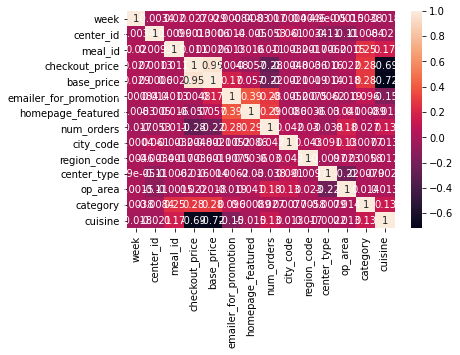

In [14]:
sns.heatmap(correlation,annot=True)
plt.show()

In [15]:
features = columns.drop(['num_orders'])
main_data2 = main_data[features]
X = main_data2.values
y = main_data['num_orders'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [16]:
x_train.shape

(342411, 7)

In [17]:
test_data=test_df.copy()
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [18]:
test_data['category']=encoder.fit_transform(test_data['category'])
test_data['center_type']=encoder2.fit_transform(test_data['center_type'])
test_data['cuisine']=encoder3.fit_transform(test_data['cuisine'])
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [19]:
test_data1=test_data.copy()
test_data1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2,2.0,0,3
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2,2.0,0,3
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2,2.0,0,3
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2,2.0,0,3
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2,2.0,0,3


In [20]:
test_data_final=test_data1.drop(columns=['id','center_id','meal_id','week','checkout_price','base_price','center_type'],axis=1)
test_data_final.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,3
4,0,0,647,56,2.0,0,3


In [21]:
#Building Models

In [22]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL

0.6295586792091123

In [26]:
# !pip install xgboost
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(x_train, y_train)
y_pred = XG.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
print(RMSEL)


0.6852918836223324


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
y_pred = GB.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


0.9431287796406321

In [28]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


0.6294590656522306

In [29]:
y=train_file['num_orders']


In [30]:
from lightgbm import LGBMRegressor,plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.model_selection import GridSearchCV


In [31]:
# !pip install lightgbm
from lightgbm import LGBMRegressor
lgb_model=LGBMRegressor(importance_type='gain')
lgbm_params = {
    "n_estimators":[230,260],
    "num_leaves":[41,51],
    'min_child_samples':[40,45,50],
    'random_state':[2019]
  
}
lgb_model.set_params(**lgbm_params) #base model

LGBMRegressor(importance_type='gain', min_child_samples=[40, 45, 50],
              n_estimators=[230, 260], num_leaves=[41, 51],
              random_state=[2019])

In [32]:
lgb_grid=GridSearchCV(lgb_model,lgbm_params,cv=5,scoring='neg_mean_squared_error',n_jobs=8)

In [33]:
model=lgb_grid.fit(x_train,y_train)

In [34]:
lgb_estimate=model.best_estimator_
lgb_estimate

LGBMRegressor(importance_type='gain', min_child_samples=50, n_estimators=260,
              num_leaves=51, random_state=2019)

In [35]:
y_pred=model.predict(x_test)
y_pred

array([396.24319312, 116.54608316,  60.42639822, ..., 463.23949173,
        52.8740641 , 144.91169307])

In [36]:
y_pred[y_pred<0] = 0
RMSEL=mean_squared_log_error(y_test, y_pred)
RMSEL=np.sqrt(RMSEL)
RMSEL


0.6487183707268681

In [37]:
#by comparision the error value of differents models for training data, the lowest error value got from Random Forest Regressio Model
#prediction on test data by Random Forest Regressor

In [38]:
test_data_final.head()

,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine
0,0,0,647,56,2.0,0,3
1,0,0,647,56,2.0,0,3
2,0,0,647,56,2.0,0,3
3,0,0,647,56,2.0,0,3
4,0,0,647,56,2.0,0,3


In [39]:
main_data2.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [40]:
pred_test_data= RF.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submit = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})

In [41]:
submit.head()

,id,num_orders
0,1028232,729.665147
1,1262649,729.665147
2,1453211,729.665147
3,1262599,729.665147
4,1495848,729.665147


In [42]:
submit.to_csv("output/submission_RFR.csv", index=False)

In [43]:
pred_test_data= DTR.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submitDTR = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})
submitDTR.head()
submitDTR.to_csv("output/submission_DTR.csv", index=False)

In [44]:
pred_test_data= XG.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submitXG = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})
submitXG.head()
submitXG.to_csv("output/submission_XG.csv", index=False)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6'] ['emailer_for_promotion', 'homepage_featured', 'city_code', 'region_code', 'op_area', 'category', 'cuisine']
expected f0, f3, f6, f2, f4, f5, f1 in input data
training data did not have the following fields: category, cuisine, emailer_for_promotion, city_code, homepage_featured, region_code, op_area

In [45]:
pred_test_data= GB.predict(test_data_final)
pred_test_data[pred_test_data<0] = 0
submitGB = pd.DataFrame({
    'id' :test_data['id'],
    'num_orders' : pred_test_data
})
submitGB.head()
submitGB.to_csv("output/submission_GB.csv", index=False)